# 13:10–15:00 | Datenvisualisierung mit Matplotlib & Seaborn

**Ziel:**

Teilnehmende können grundlegende Diagramme erstellen, richtig lesen und einfache Insights aus Daten ableiten.

### Einstieg: Warum Datenvisualisierung?

Inhalte:

- Warum Visualisierung in Data Science so wichtig ist

- Diagramme ≠ Deko → Diagramme als Entscheidungswerkzeug

- Gute vs. schlechte Visualisierung (kurze Beispiele)

### **0) Setup**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()  # macht Plots automatisch "schöner"

### **1) Beispieldaten erstellen (kein Upload nötig)**

In [3]:
np.random.seed(42)

n = 80
df = pd.DataFrame({
    "first_name": np.random.choice(["Anna","Ben","Clara","David","Elif","Fatima","Jonas","Lina","Mehmet","Noah"], size=n),
    "last_name": np.random.choice(["Müller","Schmidt","Fischer","Weber","Kaya","Hoffmann","Schulz","Wagner"], size=n),
    "age": np.random.randint(18, 60, size=n),
    "course": np.random.choice(["Python Basics", "Pandas", "SQL", "Deep Learning"], size=n, p=[0.35, 0.30, 0.20, 0.15]),
    "study_hours": np.round(np.random.gamma(shape=2.2, scale=2.0, size=n), 1),  # viele kleine, wenige große Werte
    "satisfaction": np.round(np.clip(np.random.normal(loc=7.2, scale=1.4, size=n), 1, 10), 1),
    "level": np.random.choice(["Beginner", "Intermediate"], size=n, p=[0.65, 0.35])
})

df.head()

,first_name,last_name,age,course,study_hours,satisfaction,level
0,Jonas,Schulz,49,Python Basics,1.1,5.6,Beginner
1,David,Müller,24,Deep Learning,0.8,8.7,Beginner
2,Lina,Wagner,39,Pandas,1.4,7.5,Beginner
3,Elif,Müller,45,Pandas,9.0,6.8,Beginner
4,Jonas,Weber,19,SQL,6.7,7.8,Beginner


### **2) Erste schnelle Checks (EDA light)**

In [ ]:
df.info()
df.describe(numeric_only=True)
df["course"].value_counts()

## **A) Matplotlib Beispiele**

### Matplotlib – Grundlagen

Inhalte

- Was ist Matplotlib?

- Aufbau eines einfachen Plots

- plt.figure(), plt.plot(), plt.xlabel(), plt.ylabel(), plt.title()

Beispiel:

- Entwicklung eines Wertes über Zeit

Praxis

- Einfaches Liniendiagramm aus einem DataFrame erstellen

### Wichtige Diagrammtypen mit Matplotlib

Inhalte

- Liniendiagramm (Trend)

- Balkendiagramm (Vergleich)

- Histogramm (Verteilung)

- Streudiagramm (Zusammenhang)

Praxis

- Welches Diagramm für welche Fragestellung?

- Typische Fehler (falsche Achsen, zu viele Farben)

### **3) Balkendiagramm: Anzahl pro Kurs**

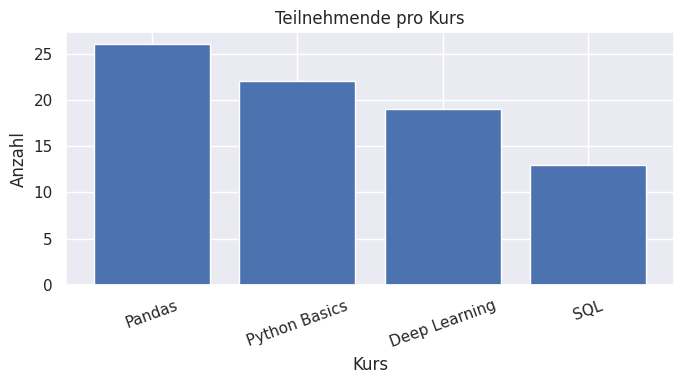

In [4]:
course_counts = df["course"].value_counts()

plt.figure(figsize=(7,4))
plt.bar(course_counts.index, course_counts.values)
plt.title("Teilnehmende pro Kurs")
plt.xlabel("Kurs")
plt.ylabel("Anzahl")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### **4) Histogramm: Verteilung der Lernstunden**

In [ ]:
plt.figure(figsize=(7,4))
plt.hist(df["study_hours"], bins=12)
plt.title("Verteilung der Lernstunden")
plt.xlabel("Lernstunden")
plt.ylabel("Häufigkeit")
plt.tight_layout()
plt.show()

### **5) Scatterplot: Lernstunden vs. Zufriedenheit**

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(df["study_hours"], df["satisfaction"], alpha=0.7)
plt.title("Lernstunden vs. Zufriedenheit")
plt.xlabel("Lernstunden")
plt.ylabel("Zufriedenheit (1–10)")
plt.tight_layout()
plt.show()

## **B) Seaborn Beispiele**

### Seaborn – schöner & statistischer

Inhalte

- Unterschied Matplotlib vs. Seaborn

- Warum Seaborn für Data Science?

Wichtige Plots:

- sns.barplot

- sns.boxplot

- sns.histplot

- sns.scatterplot

Praxis

- Visualisierung direkt aus Pandas-DataFrames

- Automatische Aggregationen & Konfidenzintervalle

### **6) Boxplot: Zufriedenheit nach Kurs (Ausreißer + Vergleich)**

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="course", y="satisfaction")
plt.title("Zufriedenheit nach Kurs")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### **7) Barplot: Durchschnittliche Zufriedenheit je Kurs**

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="course", y="satisfaction", errorbar="ci")
plt.title("Ø Zufriedenheit je Kurs (mit Unsicherheit)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### **8) Scatterplot mit Farbe (Hue): Level als Gruppe**

In [ ]:
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x="study_hours", y="satisfaction", hue="level")
plt.title("Lernstunden vs. Zufriedenheit (nach Level)")
plt.tight_layout()
plt.show()

### **9) Optional: Heatmap (Korrelation numerischer Variablen)**

In [ ]:
corr = df[["age","study_hours","satisfaction"]].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1)
plt.title("Korrelationen")
plt.tight_layout()
plt.show()

## **Von Diagrammen zu Insights**

**Inhalte**

- Wie liest man Diagramme richtig?

**Typische Analysefragen:**

- Wo gibt es Ausreißer?

- Gibt es Trends?

- Gibt es Unterschiede zwischen Gruppen?

- Storytelling mit Daten (kurz & praxisnah)

**Praxis**

- Gemeinsam ein Diagramm interpretieren

- „Was kann man daraus sagen – und was nicht?“

## 🧠 **Übungen im Kurs**

### CSV-Datei zum Laden für die Übungen

Aufgabe:

CSV-Datei aus Notion laden und im Notebook verwenden

### 1️⃣ Übung 1: Filter + Histogramm

**Aufgabe:**

Erstelle ein Histogramm der Lernstunden nur für “Python Basics”.

- Hint: df[df["course"] == "Python Basics"]

### 2️⃣ Übung 2: Barplot nach Gruppe

**Aufgabe:**

Zeige die durchschnittliche Zufriedenheit nach Level (Beginner/Intermediate) als Seaborn-Barplot.

### 3️⃣ Übung 3: Top 5 Lernende

**Aufgabe:**

Finde die Top 5 Personen mit den meisten Lernstunden und plotte deren Lernstunden als Balkendiagramm.

### 4️⃣ Übung 4: Zwei Diagramme vergleichen (Matplotlib vs Seaborn)

**Aufgabe:**

- Erstelle mit Matplotlib ein Balkendiagramm: Anzahl pro Level

- Erstelle dasselbe mit Seaborn (countplot)

### ✅ **Lösungen**

In [ ]:
import pandas as pd

df = pd.read_csv("vhs_datenvisualisierung_uebungsdaten.csv")
df.head()

In [ ]:
# Übung 1: Filter + Histogramm

subset = df[df["course"] == "Python Basics"]

plt.figure(figsize=(7,4))
plt.hist(subset["study_hours"], bins=10)
plt.title("Lernstunden – Python Basics")
plt.xlabel("Lernstunden")
plt.ylabel("Häufigkeit")
plt.tight_layout()
plt.show()

In [ ]:
# Übung 2: Barplot nach Gruppe

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="level", y="satisfaction", errorbar="ci")
plt.title("Ø Zufriedenheit nach Level")
plt.tight_layout()
plt.show()

In [ ]:
# Übung 3: Top 5 Lernende

top5 = df.sort_values("study_hours", ascending=False).head(5)
top5["full_name"] = top5["first_name"] + " " + top5["last_name"]

plt.figure(figsize=(7,4))
plt.bar(top5["full_name"], top5["study_hours"])
plt.title("Top 5 Lernstunden")
plt.xlabel("Person")
plt.ylabel("Lernstunden")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

top5[["full_name","study_hours","course","satisfaction"]]

In [ ]:
# Übung 4: Zwei Diagramme vergleichen (Matplotlib vs Seaborn)

# 1) Matplotlib
counts = df["level"].value_counts()

plt.figure(figsize=(5,4))
plt.bar(counts.index, counts.values)
plt.title("Anzahl pro Level (Matplotlib)")
plt.xlabel("Level")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.show()

# 2) Seaborn
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="level")
plt.title("Anzahl pro Level (Seaborn)")
plt.tight_layout()
plt.show()

## Zusammenfassung & Ausblick

**Inhalte**

- Best Practices für gute Visualisierungen

**Checkliste:**

- Klarer Titel?

- Richtiger Diagrammtyp?

- Lesbare Achsen?

**Ausblick:**

- Kombination mit Pandas & EDA

- Dashboards (z. B. Streamlit, Power BI, Tableau – nur Überblick)

# **15:00–15:20 | ☕☕☕ Pause ☕☕☕**

# 15:20–16:40 | Mini-Projekt

Explorative Datenanalyse mit Python (Gruppenarbeit)

🎯 Ziel

Ihr analysiert einen realistischen Datensatz und beantwortet konkrete Fragen mit:

- Tabellen

- Diagrammen

- kurzen schriftlichen Erkenntnissen (Insights)

👥 Gruppenarbeit (3–4 Personen)

Empfohlene Rollen:

- 👩‍💻 Driver: schreibt den Code

- 🧭 Navigator: liest Aufgaben, denkt mit

- 🎨 Visualizer: kümmert sich um Diagramme

- 🗣️ Presenter: erklärt Ergebnisse

➡️ Präsentation (5 Minuten pro Gruppe)

- 1–2 Diagramme

- 3 zentrale Insights

- 1 Empfehlung

## 📝 Aufgaben im Mini-Projekt

### Aufgabe 0) Daten einlesen und verstehen

Fragen:

- Wie viele Zeilen gibt es?

- Welche Datentypen?

- Welche Kurse gibt es?

### Aufgabe 1) Welche Kurse sind am beliebtesten?

Diagramm: Balkendiagramm

Frage:

- Wie viele Teilnehmende gibt es pro Kurs?

Insight (Beispiel):

- Python Basics hat die meisten Teilnehmenden. Deep Learning wird deutlich seltener besucht.

### Aufgabe 2) Wer ist am zufriedensten?

Diagramm: Boxplot (Seaborn)

Fragen:

- Welcher Kurs hat die höchste Median-Zufriedenheit?

- Gibt es Ausreißer?

### Aufgabe 3) Lernstunden vs. Zufriedenheit

Diagramm: Scatterplot mit Gruppen

Fragen:

- Gibt es einen Zusammenhang?

- Lernen Intermediate anders als Beginner?

### Aufgabe 4) Empfehlung ableiten

✍️ Schreibt 1–2 konkrete Empfehlungen für das Kurs-Team.

Hilfssatz (für Einsteiger:innen):

- Ich sehe …

- Das deutet darauf hin, dass …

- Deshalb empfehlen wir …

### ✅ **Lösungen des Mini-Projektes**

In [ ]:
# Daten einlesen
import pandas as pd

df = pd.read_csv("vhs_datenvisualisierung_uebungsdaten.csv")
df.head()

In [ ]:
# Aufgabe 0) Daten verstehen

df.info()
df.describe(numeric_only=True)
df["course"].value_counts()

In [ ]:
# Aufgabe 1) Welche Kurse sind am beliebtesten?

import matplotlib.pyplot as plt

course_counts = df["course"].value_counts()

plt.figure(figsize=(7,4))
plt.bar(course_counts.index, course_counts.values)
plt.title("Teilnehmende pro Kurs")
plt.xlabel("Kurs")
plt.ylabel("Anzahl")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
# Aufgabe 2) Wer ist am zufriedensten?

import seaborn as sns
sns.set_theme()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="course", y="satisfaction")
plt.title("Zufriedenheit nach Kurs")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [ ]:
# Aufgabe 3) Lernstunden vs. Zufriedenheit

plt.figure(figsize=(7,4))
sns.scatterplot(
    data=df,
    x="study_hours",
    y="satisfaction",
    hue="level"
)
plt.title("Lernstunden vs. Zufriedenheit")
plt.tight_layout()
plt.show()